In [7]:
#math and linear algebra stuff
import numpy as np
import numpy.linalg as la
import scipy as sc
import scipy.ndimage as scim
import scipy.signal as sisp

#Stat
import scipy.stats as sist
import scipy.special as sispec

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to statistical tests

This small notebook intends to present what is a statistical test, what are the different kind of hypothesis, and associated tests, and show some applications.

## Some definitions

### The null hypothesis, independent and uncorrelated variables

According to [wikipedia](https://en.wikipedia.org/wiki/Null_hypothesis), the null hypothesis states that there is no relationship between two measured phenomena, or no association among groups, and the field of statistics gives precise criteria for rejecting a null hypothesis.

More precisely, still according to wikipedia, there are two ways of testing such hypothesis:

* In the significance testing approach of Ronald Fisher, a null hypothesis is rejected if the observed data are significantly unlikely to have occurred if the null hypothesis were true

* In the hypothesis testing approach of Jerzy Neyman and Egon Pearson, a null hypothesis is contrasted with an alternative hypothesis and the two hypotheses are distinguished on the basis of data, with certain error rates

Statistical inference can be done without a null hypothesis, by specifying a statistical model corresponding to each candidate hypothesis and using model selection techniques to choose the most appropriate model.
The most common selection techniques are based on either Akaike information criterion or Bayes factor.



### Independent and uncorrelated variables

We recall here in a formal way, the definitions of independent and uncorrelated variables.

#### Independent variables
Let $X$ and $Y$ be two random variables, we say that $X$ and $Y$ are independant if $P(X)=P(X|Y)$ and $P(Y)=P(Y|X)$
We also recall the following equalities, related to joint probability $P(X,Y)=P(X|Y)P(Y)=P(X)P(Y|X)$, such that in the case of independence we have: $P(X,Y)=P(X)P(Y)$.

#### Uncorrelated variables
Let $X$ and $Y$ be two random variables,
* $E_X=\mathbb{E}(X)$ and $E_Y=\mathbb{E}(Y)$ their respective expectation (mean).
* $\sigma_X^2=\mathbb{E}((X-E_X)^2)$ and $\sigma_Y^2=\mathbb{E}((Y-E_Y)^2)$ their respective variance.
* $\sigma_{XY}^2=\mathbb{E}((X-E_X)(Y-E_Y))=\mathbb{E}(XY)-E_X E_Y$ the covariance of the pair $(X,Y)$

we say that $X$ and $Y$ are independant if their correlation $\rho_{X,Y}$ is equal to $0$, or equivalently, if their covariance matrix is diagonal.

\begin{align*}
  \rho_{X,Y} &= \frac{\sigma_{XY}^2}{\sqrt{\sigma_{X}^2\sigma_{Y}^2}} \\
  &= \frac{\sum_{i=0}^{n-1} (x_i-E_X)(y_i-E_Y) }{\sqrt{\sum_{i=0}^{n-1} (x_i-E_X)^2 \sum_{i=0}^{n-1}(y_i-E_Y)^2}}
\end{align*}

For the correlation to be zero, we basically need to covariance to be zero, hence $\mathbb{E}(XY)=E_X E_Y$

#### Independant variables are uncorrelated

Let's take a look at the term $\mathbb{E}(XY)$ in the case of continuous independant variables:

\begin{align*}
  \mathbb{E}(XY) &= \int_{\mathbb{R}} P(X=x,Y=y) xy dx dy\\
  &= \int_{\mathbb{R}} P(X=x) x P(Y=y) xy dx dy \qquad \text{because of independence}\\
  &= \int_{\mathbb{R}} P(X=x) x dx \int_{\mathbb{R}} P(X=x) x dx \\
  &= \mathbb{E}(X) \mathbb{E}(Y)
\end{align*}

They are indeed uncorrelated

#### Uncorrelated variables may be dependent

A famous example of dependent but uncorrelated variables is the following one:
Let $X$ be uniformly distributed on the interval $[−1, 1]$ such that:

\begin{align*}
  Y = \begin{cases} −X \qquad & \text{if} \; X \leq 0\\
    X & \text{otherwise} \end{cases}
\end{align*}

One can check that:
* $Y$ is uniformly distributed on [0, 1]
* $\mathbb{E}(X Y|X \leq 0) = \int_{-1}^{0} -x^2 dx = -\frac{1}{3}$
* $\mathbb{E}(X Y|X \geq 0) = \int_{0}^{1} x^2 dx = \frac{1}{3}$
* $\mathbb{E}(X Y) = 0$ because of the law of total expectation


#### Decorrelation / withenning transform

Whitenning transform is a tool that allows to decorrelate a set of samples drawn from a set of random variables of known covariance.
The idea is to make the resulting covariance of the whitenned samples equal to the identity matrix. One can limit itself to a diagonal matrix if it just want to decorrelate samples

Let $X$ be the matrix containg the centered samples (1 sample per column) drawn from each of the random variables.
The covariance matrix $C$ then writes $C=XX^T$, then the decorrelation matrix $W_D$, and the withenning matrix $W_W$ should verify,

for decorrelation:

\begin{align*}
  W_D X (W_D X)^T &= W_D X X^T W_D^T\\
  &= W_D C W_D^T \\
  &= D
\end{align*}

where $W_D C W_D^T = D$ is a diagonal matrix.
One can use an eigenvalue decomposition of the form $C = Q D Q^T$, or equivalently, thanks to positive definitiveness and spectral theorem: $D = Q^T C Q$ and make the subsequent identification $W_D=Q^T$

for whitenning:
\begin{align*}
  W_W X (W_W X)^T &= W_W X X^T W_W^T \\
  &= W_W C W_W^T \\
  &= I
\end{align*}

where $W_ W C W_W^T = I$ is the identity matrix.
One can start by using the same approach as for decorrelation, ie use use eigen decomposition and compose with $D^{-\frac{1}{2}}$ to obtain identity:
\begin{align*}
  C &= Q D Q^T \\
  D &= Q^T C Q \qquad \text{thanks to posisitve definitiveness and spectral theorem} \\
  D^{-\frac{T}{2}} D D^{-\frac{1}{2}} &= D^{-\frac{T}{2}} Q^T C Q D^{-\frac{1}{2}} \\
  I &= D^{-\frac{T}{2}} Q^T C Q D^{-\frac{1}{2}}
\end{align*}

and simply identify $W_W^T = Q D^{-\frac{1}{2}}$
Another method is to use a choleski decomposition of the form $QQ^T = C^{-1}$:

\begin{align*}
  W_W C W_W^T &= I \\
  W_W C W_W^T W_W &= W_W \\
  C W_W^T W_W &= I \\
  W_W^T W_W &= C^{-1} \\
\end{align*}

And then simply identify $W_W=Q^T$

(-0.13989385616462158,
 1.1006666221316082,
 -0.2908778522216885,
 1.4177049630373089)

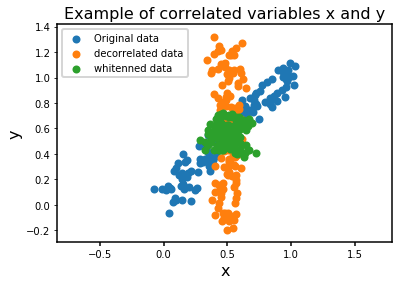

In [3]:
#Let's play along with whithening transform

#Draw samples from 2 correlated random variables
size=128
base=np.linspace(0,1,size)
x=base+0.05*np.random.normal(0,1,size)
y=base+0.05*np.random.normal(1,np.sqrt(2),size)

#Draw covariance estimation, from the matrix containing one sample per column
data=np.array([x,y])
#Substract mean for each variable
mean = data.mean(1).reshape(-1, 1)
data = data - mean
covariance=np.dot(data,data.T)

#Now generate the decorrelation matrix
diag,Q=np.linalg.eig(covariance)
decorrelated=np.dot(Q.T,data)+mean

#and the withening matrix
Q=np.linalg.cholesky(np.linalg.inv(covariance))
whitenned=np.dot(Q.T,data)+mean
assert(np.allclose(np.dot(Q.T,np.dot(covariance,Q))-np.identity(2),0))

#Draw results
plt.figure(0)
plt.scatter(x,y,label='Original data')
plt.scatter(decorrelated[0,:],decorrelated[1,:],label='decorrelated data')
plt.scatter(whitenned[0,:],whitenned[1,:],label='whitenned data')
plt.legend()
plt.title("Example of correlated variables x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

## Testing the null hypothesis with different kind of test statistics

There are four main test statistics that can be used in a hypothesis test. Which one to use depends on which statistical test is ran.

A \*-test (here * stands for a placeholder) is any statistical hypothesis test in which the test statistic follows a specific distribution ($\chi^2$, F-distribution, student's distribution) under the null hypothesis.

A test statistic, is usually a formula, that maps some data, generally outputs coming from sampling a random process, to a scalar, called a score.

Here are some example of some Test Statistics:

|Hypothesis Test | Test Statistic | Test Formula | distribution | Null hypothesis example | Comment |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Z-Test | Z-Score | $\frac{s_{\mu} - \mu}{\frac{\sigma}{\sqrt{n}}}$ | normal distribution | data with normal distribution | $n > 30$, or T-Test.$\sigma$ can be replaced by $s_{\sigma}$ |
| T-Test | T-Score | $\frac{s_{\mu} - \mu}{\frac{\sigma}{\sqrt{n}}}$  | student's distribution, with $n-1$ dof | wether two sets of data have a different mean by chance | |
| ANOVA | F-statistic | $\sum_{i=0}^{n-1} \frac{n_i(\mu_{i \cdot} - \mu)^2}{n-1} / \sum_{i=0}^{n-1}\sum_{j=0}^{n_i} \left( Y_{ij}-\mu_{i\cdot} \right)^2/(n-k),$ | F-distribution | wether two sets of data have a different mean by chance | |
| Chi-Square Test | Chi-square statistic | $\chi^2=\sum^k_{i=0}{\frac{\left(x_i-m_i\right)^2}{m_i}}$ | $\chi^2$ | test significance of cardinality of group classification


### Testing the null hypothesis with the Chi squared test

#### Introduction - Field of application

Test statistics that follow a chi-squared distribution arise from an assumption of independent normally distributed data, which is valid in many cases due to the central limit theorem

#### Example: multinomial distribution (Independent experiments, discrete exclusive outcome)

Let's take an example from an information theory background, we have a channel that generates a sequence of messages, each one containing one symbol, where only $k=4$ symbol $s_0, s_1, \dots, s_{k-1}$ exist.
If we do an experiment with $n$ messages, we can define $k$ values $x_0, x_1 \dots, x_{k-1}$ standing for the actual cardinality of each symbol in the output of the process, it writes as follow: $x_i=\sum_{j=0}^{n-1} \delta(y_{j}=s_i)$ where $y_{j}$ is the $j^{\text{th}}$ output of the random process:

Listening to this channel for $n=100$ message, we did the following statistics:

|Symbol $s_0$|Symbol $s_1$|Symbol $s_2$|Symbol $s_3$|
|--------|--------|--------|--------|
| 19 hits| 29 hits| 24 hits| 28 hits|

We suppose here that null hypothesis is valid if all symbols have equiprobability, ie $P(\delta(y_{j}=s_i)=P(\delta(s_i)=\frac{1}{k} \forall (j,i) \in \mathbb{N},{0,1,\dots,k-1}$.
If the null hypothesis is true, we should have, in law: $P(y_{j}=s_1)=P(y_{j}=s_2)=P(y_{j}=s_3)=P(y_{j}=s_4)=\frac{1}{4} \forall j$.

One can notice that we can change the null hypothesis towards a more generic version of the multinomial law where the $P(y_{j}=s_i)$ are not equal for all values of $i$. For instance, we can declare a non naive multinomial distribution.

#### A bit more about likelihood of multinomial distributions
Multinomial distribution generalizes the Bernouilli distribution from a sample space of 2 events to an arbitrary high number of outcomes.

In the framework of our example, we would still have the following constraints: $\sum _{i=1}^{k}x_{i}=n$ and $\sum_{i=1}^{k}P_{s_i}=1$

The probability of a specific outcome would be expressed as:
\begin{align*}
    P(x_{1}=n_{1},\dots, x_{k}=n_{k})= \frac{n!}{n_{1}! \dots n_{k}!} P_{s_1}^{n_{1}} \dots P_{s_k}^{n_{k}}
\end{align*}

Interestingly, each of the $x_{i}$ variables is still a bernouilli variable with expectation $\mathbb{E}(x_i)=nP_{s_i}$ and variance $\mathbb{E}[(x_i-\mathbb{E}(x_i))^2]=nP_{s_i}(1-P_{s_i})$

The expression of the probability for one outcome, given a known model, is used in various domains of engineering within a bayesian framework, as one is often interested in finding the set of parameters for a distribution that gives the maximum likelihood.
The role of the Chi square might, at first sight seem similar but it is actually quite different:

* In the case we have $x_1=\mathbb{E}_1, x_2=\mathbb{E}_2, \dots, x_k=\mathbb{E}_k$ the null hypothesis model might give the highest likelihood for the data, but the chi square won't be at the maximum value (perfect match with expectation is actually unlikely for a random process)

* Numerical value might be very different as their meaning is completely different. Chi2 statistics will indicate the probability of null hypothesis to be true, one will probably reject null hypothesis if this values is lower than 0.05 for instance. Likelihood is the probability that the null hypothesis model gave the said output, this probability can be arbitrary low, but it can still be the highest possible for all considered models.

One must also notice that in practical setting where we have quite a lot of sample, the multinomial probability expression might be numerically unstable as we have a product between number growing exponentially high and number growing exponentially low in magnitude.

In [19]:
def likelihood_multinomial(hits):
    k=hits.size
    n=hits.sum()
    equi_prob=1/k
    fact_part = sispec.factorial(n)/np.prod(sispec.factorial(hits))
    prod_part = np.power(equi_prob,n)
    return fact_part*prod_part

#### Expression of Chi square pdf

We call $E_i, i \in 0,1,2,k-1$ the expectation of the variable $x_i: E_i = \mathbb{E}(x_i)$
Then pearson showed, that, asympotically, when $n \rightarrow +\infty$ the random variable $Q$ follows a $\chi^2$ (Chi squared) law with $k-1$ degrees of freedom:

\begin{align*}
 Q = &\sum_{i=0}^{k-1} \frac{(x_i-E_i)^2}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2+E_i^2-2x_i E_i}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} + \sum_{i=0}^{k-1} \frac{E_i^2}{E_i}  -2 \sum_{i=0}^{k-1} \frac{x_i E_i}{E_i} \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} + n - 2 n \\
 &= \sum_{i=0}^{k-1} \frac{x_i^2}{E_i} - n
\end{align*}

We recall that the $\chi^2$ probability density function, with $k-1$ degrees of freedom writes:

\begin{align*}
 \chi^2(x,\,k)= \begin{cases}{
   \frac{ x^{\frac{k}{2}-1} e^{-\frac{x}{2}}}
     {2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}} , \quad & \text{if } x > 0\\
     0 & \text{otherwise}
   \end{cases}
\end{align*}

Let see how this apply to our numerical case, it should be notices that one usually reject null hypothesis when Chi-squared test outcome is below 5%:

Text(0, 0.5, 'Probability')

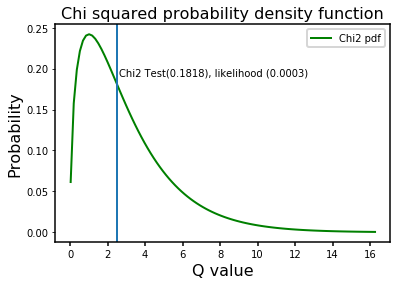

In [20]:
# Apply a simple Chi-squared test
hist=np.array([19, 29, 24, 28])

def chi_square_multinomial(hits):
    k=hits.size
    n=hits.sum()
    equi_prob=1/k
    expectations=np.repeat(equi_prob*n,k)
    Q = np.sum((hits**2)/expectations)-n

    #Define pdf of chi squared, covering from 0.1% to 99.9% cumulative
    x = np.linspace(sist.chi2.ppf(0.001, k-1),
      sist.chi2.ppf(0.999, k-1), 100)
    chi2pdf=sist.chi2.pdf(x, k-1)

    #Compute probability that the outcome is coherent with null hypothesis
    test=sist.chi2.pdf(Q, k-1)
    
    return x, Q, chi2pdf, test

x, Q, chi2pdf, test = chi_square_multinomial(hist)

#Draw Chi squared pdf
plt.figure(0)
plt.plot(x,chi2pdf,'g',label='Chi2 pdf')
plt.axvline(x=Q)
plt.annotate('Chi2 Test({:.4f}), likelihood ({:.4f})'.format(test, likelihood_multinomial(hist)), xy=(Q, test), xytext=(Q*1.05, test*1.05))
plt.legend()
plt.title("Chi squared probability density function")
plt.xlabel("Q value")
plt.ylabel("Probability")

##### Likelihood and statistical test
We thought it would be nice to take an even more simple example to vizualize the behaviour of likelihood versus Chi2 test for a coin toss (binomial) problem:

Text(0, 0.5, 'binomial likelihood for unbiased hypothesis')

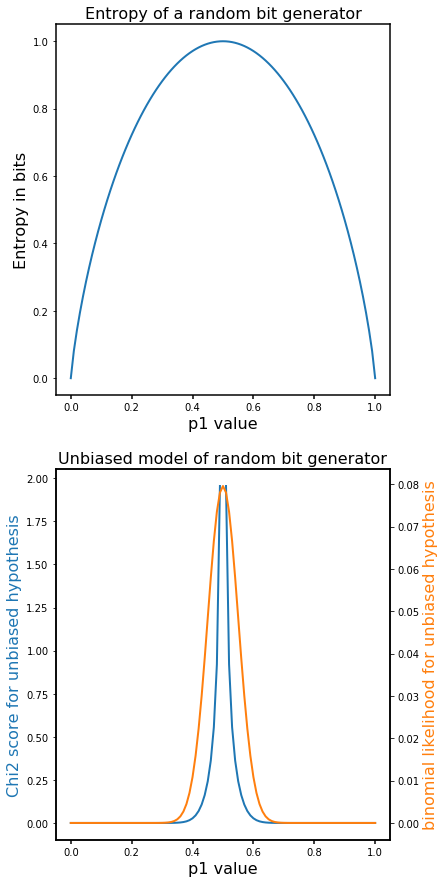

In [40]:
# n coin toss per experiments, 101 experiments, x1 is the number of times face 1 of coin was found in each of the experiment
n=100
k=2
x1=np.arange(0,101)
x2=n-x1
p1=x1/n
p2=x2/n
assert np.allclose(p1, 1-p2)

#histogram of face1/face2 for all experiments
hists = [np.array([el1,el2]) for el1, el2 in zip(x1, x2)]

#Handle the infinite value of log in 0, so that it returns 0
def SafeLog2( v ):
    r=v.copy()
    r[v!=0]=np.log2(v[v!=0])
    return r

#Entropy of a Bernouilli distribution with probability p
def BernoulliEntropy( p ):
    return -( p*SafeLog2(p)+(1-p)*SafeLog2(1-p) )

#entropy functions of p1
entropy = BernoulliEntropy(p1)
#plot likelihood for each experiment
like = np.array(list(map(likelihood_multinomial, hists)))
#plot chi2 for each experiment
chi2 = np.array([t for _, _, _, t in map(chi_square_multinomial, hists)])

#Fancy stuff
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
#f.set_figwidth(15)

ax[0].plot(p1, entropy)
ax[0].set_title('Entropy of a random bit generator')
ax[0].set_xlabel('p1 value')
ax[0].set_ylabel('Entropy in bits')

color = 'tab:blue'
ax[1].plot(p1, chi2, color=color)
ax[1].set_title('Unbiased model of random bit generator')
ax[1].set_xlabel('p1 value')
ax[1].set_ylabel('Chi2 score for unbiased hypothesis', color=color)

ax2 = ax[1].twinx()
color = 'tab:orange'
ax2.plot(p1, like, color=color)
ax2.set_ylabel('binomial likelihood for unbiased hypothesis', color=color)
#print(chi_square_multinomial(np.array([1e3, 1e3-1]))[3])

#### $\chi^2$ test for variance testing

Instead of checking for the null hypothesis alone, we can check for a given variance hypothesis.
For instance we can check a set of $n$ samples $s$ with variance estimation $\sigma_{s}^2$ against a reference normal distribution of known variance $\sigma^2$, with this simple formula:

\begin{align*}
  Q = \frac{(n-1)\sigma_{s}^2}{\sigma^2}
\end{align*}

The degrees of freedom chosen for the $\chi^2$ probability distribution function is $n-1$

## Correlation significance analysis for time series testing


### Portmanteau test for autocorrelation against null hypothesis

Portmanteau test for autocorrelation is aprticularly well suited to analyze discrete time series of the form $s$ of length $n$.

Here again, we consider two hypothesis, $H_0$ being the null hypothesis, and $H_a$ being that the data are not independantly distributed, but instead there is a serial correlation.

To setup such method, we start by defining the sample autocorrelation $\hat{\rho_k}$ of signal $s$ at lag $k$, that uses $E_s$ the expectation (mean) of $s$: $E_s=\mathbb{E}(s)$:

\begin{align*}
  \hat{\rho_k} &= \frac{ \frac{1}{n-k} \sum_{i=0}^{n-k-1} (s[i]-E_s)(s[i+k]-E_s) }{\frac{1}{n} \sum_{i=0}^{n-1} (s[i]-E_s)(s[i]-E_s)} \\
  &= \frac{ \frac{1}{n-k} \sum_{i=0}^{n-k-1} (s[i]-E_s)(s[i+k]-E_s) }{\sigma_s^2}
\end{align*}

Then one can derive the Ljung-Box test for $h$ different lag:

\begin{align*}
  Q_{LB} = n(n+2)\sum_{k=1}^{h} \frac{\hat{\rho_k}}{n-k}
\end{align*}

And then one can use the $\chi^2$ probability density function with $h$ degrees of freedom to assess the probability of the $H_0$ hypothesis being true.

### Kendall rank correlation for non-parametric time series independance hypothesis testing

from [Wikipedia](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

#### Kendall's $\tau$ coefficient
A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient
Kendall's method is very elegant because it takes into account rank instead of values, and should be more relevant in the case of nonlinearities.

Let $(x1, y1), (x2, y2), \dots, (xn, yn)$ be a set of observations of the joint random variables $X$ and $Y$ respectively, such that all the values of $x_{i}$ and $y_{i}$ are unique.

Any pair of observations $(x_{i},y_{i})$ and $(x_{j},y_{j})$, where $i\not =j$, are said to be concordant if the ranks for both elements (more precisely, the sort order by x and by y) agree: that is, if both $x_{i}>x_{j}$ and $y_{i}>y_{j}$; or if both $x_{i}<x_{j}$ and $y_{i}<y_{j}$.

They are said to be discordant, if $x_{i}>x_{j}$ and $y_{i}<y_{j}$; or if $x_{i}<x_{j}$ and $y_{i}>y_{j}$.

If $x_{i}=x_{j}$ or $y_{i}=y_{j}$, the pair is neither concordant nor discordant.

Kendall's Tau is then defined as:

\begin{align*}
 \tau = \frac{n_c - n_d}{0.5 \cdot n(n-1)}
\end{align*}

Where we have:
* $n_c$ is the number of concordant pairs
* $n_d$ is the number of discordant pairs
* the denominator is the total number of possible pairs

We can notice that a perfect concordance shoud result in a $\tau$ coefficient of 1, perfect discordance in a $\tau$ coefficient of -1, and independance should result in a $\tau$ coefficient close to zero.




#### Kendall's $\tau$ coefficient in case of tied pairs

In case of tied pairs, that may occur in case one is playing with quantized signals, we have:

* $n_0 = \frac{n(n-1)}{2}$ the total number of pairs
* $n_1 = \frac{\sum_{i}t_i(t_i-1)}{2}$ total number of tied values for the first quantity
* $n_2 = \frac{\sum_{j}u_j(u_j-1)}{2}$ total number of tied values for the second quantity
* $t_i$ the number of tied values for the $i^{th}$ group for the first quantity
* $u_j$ the number of tied values for the $j^{th}$ group for the second quantity

\begin{align*}
 \tau = \frac{n_c - n_d}{\sqrt{(n_0-n_1)(n_0 - n_2)}}
\end{align*}

#### Hypothesis testing with normal pdf

Under the null hypothesis of independence of $X$ and $Y$, the sampling distribution of $\tau$ has an expected value of $0$. The precise distribution cannot be characterized in terms of common distributions, but may be calculated exactly for small samples; for larger samples, it is common to use an approximation to the normal distribution, with mean $0$ and variance $\frac{2(2n+5)}{9n(n-1)}$

One can also directly check for the "z-score", defined as:

\begin{align*}
  z(x,y) = \frac{3(n_c-n_d)}{\sqrt{\frac{n(n-1)(2n+5)}{2}}}
\end{align*}

Which is very convenient because $z(x,y)$ has been shown to be asymptotically distributed following a normal normal distribution:

\begin{align*}
  z(X,Y) \underset{n \rightarrow +\infty}{\sim} \mathcal{N}(0,\,1)
\end{align*}

#### Hypothesis testing in the case of tied pairs

In this case, the z-score reads:

\begin{align*}
  z(x,y) = \frac{n_c-n_d}{\sqrt{v}}
\end{align*}

Where:

* $v = \frac{v_0-v_t-v_u}{18}+v_1+v_2$
* $v_0 = n(n-1)(2n+5)$
* $v_t = \sum_{i}t_i(t_i-1)(2t_i+5)$
* $v_u = \sum_{j}u_j(u_j-1)(2u_j+5)$
* $v_1 = \sum_{i}t_i(t_i-1)\frac{\sum_{j}u_j(u_j-1)}{2n(n-1)}$
* $v_2 = \sum_{i}t_i(t_i-1)(t_i-2)\frac{\sum_{j}u_j(u_j-1)(u_j-2)}{9n(n-1)(n-2)}$

#### Correlation significance + noise estimation using Kendall's tau

A very nice application of Kendall's tau correlation coefficient can be found in the work of Camille Sutour in "Estimation of the noise level function based on a non-parametric detection of homogeneous image regions"

The idea is to define two neighbouring sequences of values inside an image patch of finite size, by choosing either the even or the odd indices: $x=b_{2k}$ and $y=b_{2k+1}$

According to the author's work, in practice, one is interested in using $z(x,y)$ to compute directly the probability of false alarm, which is given through the use of $\phi$ the cumulative gaussian distribution for 0 mean and unit variance:

\begin{align*}
  \phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt \\
\end{align*}

Implementations of the function $\phi$ can sometimes be found under the name cdf or normcdf in some languages/libraries.

The probability that the patch contains pure noise (null hypothesis) can then be computed as $P(H_0) = 1-2\phi(|z(x,y)|)$

A typical value for probability threshold is 0.7 (still according to the author of the paper), that has to be reached for a set of 4 neighbouring graph described in the paper.

#### Model estimation

Once pure noise areas have been found, one can assume locally stationary noise behaviour, can then compute for each patch its mean $\mu=\frac{1}{N} \sum_{i=0}^{N-1} x_i$ and the unbiased estimator of variance $\sigma^2=\frac{1}{N-1} \sum_{i=0}^{N-1} (x_i-\mu)^2$.

Given a list of pairs $\left( \hat{\mu_p}, \hat{\sigma_p}^2 \right)$, one is now interested in knowing the Noise Level Function (NLF), which is a $\mathbb{R} \rightarrow \mathbb{R}^+$ function, that gives the noise variance for a fiven level of image intensity.

The author assumes that the NLF is a positively increasing second order polynomial of the image intensity. Then one just performs a least square on the following problem:

\begin{align*}
  \underset{x\in\mathbb{R}^3}{\text{min}} \qquad ||Ax-b||_2^2
\end{align*}

Where we have:

* $A=\begin{pmatrix} \mu_0^2 & \mu_0 & 1\\
\mu_1^2 & \mu_1 & 1\\
\vdots & \vdots & \vdots\\
\mu_{N-1}^2 & \mu_{N-1} & 1\end{pmatrix}$

* $b=\begin{pmatrix}\sigma_0^2\\ \sigma_1^2 \\ \vdots \\ \sigma_{N-1}^2\end{pmatrix}$

The solution vector $\hat{x}$ is given by Moore-Penrose pseudo-inverse: $A^+ b$ where $A^+=(A^T A)^{-1} A^T$
However, the author prefers to use the least absolute deviation, with positivity constraint:

\begin{align*}
  \underset{x\in\mathbb{R}^{+3}}{\text{min}} \qquad ||Ax-b||_1
\end{align*}

As we know the proximity operator of the positive orthant indicator, as well as the proximity operator of the $L_1$ norm, the author designed a Chambolle-Pock instance that solves the convex problem (we wrote a specific jupyter notebook on this topic)

### Moran's I for autocorelation

#### Definition

Moran's I is a measure of spatial autocorrelation for a given signal of interest $x$ length $N$, that reads:

\begin{align*}
  I = \frac{N}{W}\frac{\sum_{i=0}^{N-1}\sum_{j=0}^{N-1} w_{ij} (x_i-\bar{x})(x_j-\bar{x})}{\sum_{i=0}^{N-1} (x_i-\bar{x})^2}
\end{align*}

Where $w{ij}$ are the elements of the spatial weight matrix, where usually, $w{ij}=1$ if $i$ and $j$ are close to each other, and $w{ij}=0$ otherwise, and $W$ is simply the sum of all $w{ij}$.

#### Statistical hypothesis testing

The expected value of Moran's ''I'' under the null hypothesis of no spatial autocorrelation is
\begin{align*}
  E(I) = \frac{-1} {N-1}
\end{align*}

At large sample sizes (i.e., as N approaches infinity), the expected value approaches zero.

Its variance equals
\begin{align*}
  \operatorname{Var}(I) = \frac{NS_4-S_3S_5} {(N-1)(N-2)(N-3)W^2} - (E(I))^2
\end{align*}

where
* $S_1 = \frac 1 2 \sum_i \sum_j (w_{ij}+w_{ji})^2$
* $S_2 = \sum_i \left( \sum_j w_{ij} + \sum_j w_{ji}\right)^2$
* $S_3 = \frac {N^{-1} \sum_i (x_i - \bar x)^4} {(N^{-1} \sum_i (x_i - \bar x)^2)^2}$
* $S_4 = (N^2-3N+3)S_1 - NS_2 + 3W^2$
* $S_5 = (N^2-N) S_1 - 2NS_2 + 6W^2$

Values of ''I'' usually range from &minus;1 to +1. Values significantly below -1/(N-1) indicate negative spatial autocorrelation and values significantly above -1/(N-1) indicate positive spatial autocorrelation. For statistical hypothesis testing, Moran's ''I'' values can be transformed to z-scores.

#### Short example of use of Moran's I on 1D signal:

We are going to test the null hypothesis (there is no correlation in the signal) against a set of randomly sampled data points (1D).


Probability that null hypothesis is unlikely is 0.3364691007005667 instead of a minimum of 0.05 we decide to accept the null hypothesis: there is no significand autocorrelation


Text(0,0.5,'Probability')

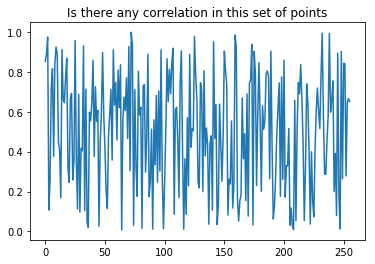

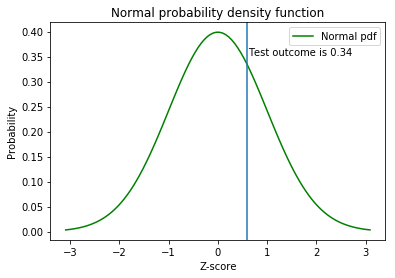

In [5]:
# Trying out Moran's I on a set of 1D data:
N = 256
data = np.random.rand(N)
plt.figure()
plt.plot(data)
plt.title('Is there any correlation in this set of points')

# Starting from 0 matrix, then filling off-diagonal terms
Wm = np.zeros((N,N))
Wm[np.arange(N-1),1+np.arange(N-1)]=1
Wm[1+np.arange(N-1),np.arange(N-1)]=1
W=Wm.sum()

# Actual Moran I for the current case
c = data-data.mean()
MoranI=(N/W)*np.dot(c,np.dot(Wm,c))/np.sum(c**2)

# Expectation of Moran I for null hypothesis
E=-1/(N-1)

# Computing variance of Moran I under null hypothesis
S1=0.5*np.sum((Wm+Wm.T)**2)
S2=np.sum((Wm.sum(axis=0)+Wm.sum(axis=1))**2)
S3=sist.moment(data,moment=4)/sist.moment(data,moment=2)**2
S4=(N**2-3*N+3)*S1-N*S2+3*W**2
S5=(N**2-N)*S1-2*N*S2+6*W**2
V=(N*S4-S3*S5)/((N-1)*(N-2)*(N-3)*W**2) - E**2

# Now that we computed the expectation and variance, we can get the zscore
zscore = (MoranI-E)/np.sqrt(V)

# Let's choose a confidence threshold, by default, it is 0.05 (5%)
rejectionZ = 0.05

#Define pdf of normal distribution
x = np.linspace(sist.norm.ppf(0.001),
  sist.norm.ppf(0.999), 100)
normpdf=sist.norm.pdf(x)

#Compute probability that the outcome is coherent with null hypothesis
test=sist.norm.pdf(zscore)

if (test<rejectionZ):
  print('Probability that null hypothesis is unlikely is '
        +str(test)+' instead of a minimum of '+str(rejectionZ)
        +' we decide to reject the null hypothesis: there is significqand autocorrelation')
else:
  print('Probability that null hypothesis is unlikely is '
        +str(test)+' instead of a minimum of '+str(rejectionZ)
        +' we decide to accept the null hypothesis: there is no significand autocorrelation')

#Draw normal pdf
plt.figure(0)
plt.plot(x,normpdf,'g',label='Normal pdf')
plt.axvline(x=zscore)
plt.annotate('Test outcome is {0:.2f} %'.format(test*100), xy=(zscore, test), xytext=(zscore*1.05, test*1.05))
plt.legend()
plt.title("Normal probability density function")
plt.xlabel("Z-score")
plt.ylabel("Probability")

## Testing more complex statistical models alone

### Akaike information criterion

[From Wikipedia, the free encyclopedia:](https://en.wikipedia.org/wiki/Akaike_information_criterion)

#### Introduction - Field of application

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

Suppose that we have a statistical model of some data. Let $k$ be the number of estimated parameters in the model. Let $\hat{L}$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following

\begin{align*}
  AIC = 2k-2 ln(\hat{L})
\end{align*}

Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. Thus, AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, because increasing the number of parameters in the model almost always improves the goodness of the fit.

AIC is founded in information theory. Suppose that the data is generated by some unknown process $f$. We consider two candidate models to represent $f$: $g_1$ and $g_2$. If we knew $f$, then we could find the information lost from using $g_1$ to represent $f$ by calculating the Kullback–Leibler divergence, $D_{KL}(f ‖ g_1)$; similarly, the information lost from using $g_2$ to represent $f$ could be found by calculating $D_{KL}(f ‖ g_2)$. We would then choose the candidate model that minimized the information loss.

We cannot choose with certainty, because we do not know f. Akaike showed, however, that we can estimate, via AIC, how much more (or less) information is lost by $g_1$ than by $g_2$. The estimate, though, is only valid asymptotically; if the number of data points is small, then some correction is often necessary (see AICc, below).

#### AICc

ICc is AIC with a correction for finite sample sizes. The formula for AICc depends upon the statistical model. Assuming that the model is univariate, linear, and has normally-distributed residuals (conditional upon regressors), the formula for AICc is as follows

\begin{align*}
  AICc =  AIC + \frac{2k (k+1)}{n-k-1}
\end{align*}

where n denotes the sample size and k denotes the number of parameters.

If the assumption of a univariate linear model with normal residuals does not hold, then the formula for AICc will generally change.
AICc is essentially AIC with a greater penalty for extra parameters. Using AIC, instead of AICc, when n is not many times larger than k2, increases the probability of selecting models that have too many parameters, i.e. of overfitting

#### Relative likelihood

To apply AIC in practice, we start with a set of candidate models, and then find the models' corresponding AIC values. There will almost always be information lost due to using a candidate model to represent the "true model" (i.e. the process that generates the data). We wish to select, from among the candidate models, the model that minimizes the information loss. We cannot choose with certainty, but we can minimize the estimated information loss.

Suppose that there are $R$ candidate models. Denote the AIC values of those models by $AIC_1, AIC_2, AIC_3, \dots , AIC_R$. Let $AIC_{min}$ be the minimum of those values. Then the quantity $exp^{\frac{AIC_{min} − AIC_i}{2}}$ can be interpreted as being proportional to the probability that the $i^{th}$ model minimizes the (estimated) information loss.

The quantity $e^{\frac{AIC_{min} − AIC_i}{2}}$ is known as the relative likelihood of model i.

As an example, suppose that there are three candidate models, whose AIC values are 100, 102, and 110. Then the second model is $exp^{\frac{100 − 102}{2}} = 0.368$ times as probable as the first model to minimize the information loss. Similarly, the third model is $exp^{\frac{100 − 110}{2}} = 0.007$ times as probable as the first model to minimize the information loss.

In this example, we would omit the third model from further consideration. We then have three options:

1. gather more data, in the hope that this will allow clearly distinguishing between the first two models
2. simply conclude that the data is insufficient to support selecting one model from among the first two
3. take a weighted average of the first two models, with weights proportional to 1 and 0.368, respectively, and then do statistical inference based on the weighted multimodel.

### Bayesian information criterion
[From Wikipedia, the free encyclopedia:](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

The BIC is formally defined as

\begin{align*}
  BIC &= ln(n)k - 2ln(\hat{L})
\end{align*}
where

* $\hat{L} =$ the maximized value of the likelihood function of the model $M$, i.e. $\hat{L} =p(x|\hat{\theta},M)$ 
where $\hat{\theta}$ are the parameter values that maximize the likelihood function;
* $x =$ the observed data
* $n =$ the number of data points in $x$, the number of observations, or equivalently, the sample size
* $k =$ the number of parameters estimated by the model. If the model under consideration is a multiple linear
regression, then the estimated parameters are the intercept, $q$ slope parameters and the constant variance of the
errors. Thus, $k=q+2$

The BIC is an asymptotic result derived under the assumptions that the data distribution is in an exponential family. That is, the integral of the likelihood function $p(x|\theta ,M)$ times the prior probability distribution $p(\theta |M)$ over the parameters $\theta$  of the model $M$ for fixed observed data $x$ is approximated as

\begin{align*}
  -2 \cdot \ln(p(x|M)) \approx BIC = -2\cdot ln(\hat{L}) + k \cdot (ln(n)-ln(2\pi))
\end{align*}

For large $n$, this can be approximated by the formula given above. The BIC is used in model selection problems where adding a constant to the BIC does not change the result.

## Testing model against each other (model selection)


### Bayes factor

#### Introduction

In statistics, the use of Bayes factors is a Bayesian version of classical method for model selection.

#### Bayes theorem, likelihood and model probability

The Bayes factor is a ratio of the likelihood probability of two competing hypothesis, usually a null and an alternative.

The posterior probability $P(M|D)$ of a model $M$ given data $D$ is given by Bayes' theorem:

\begin{align*}
  P(M|D) = \frac{P(D|M)P(M)}{P(D)}
\end{align*}

The data-dependent term $P(D|M)$ is a likelihood, and represents the probability that some data are produced under the assumption of this model, $M$ evaluating it correctly is the key to Bayesian model comparison.

Given a model selection problem in which we have to choose between two models on the basis of observed data $D$, the plausibility of the two different models $M_1$ and $M_2$, parametrized by model parameter vectors $\theta_{1}$  and $\theta_{2}$ is assessed by the Bayes factor $K$ given by

\begin{align*}
  K &= \frac{P(D|M_1)}{P(D|M_2)} \\
  &= \frac{\sum_{\theta_1} P(\theta_1|M_1)P(D|\theta_1,M_1)}{\sum_{\theta_2} P(\theta_2|M_2)P(D|\theta_2,M_2)} \\
  &= \frac{P(M_1|D)P(M_2)}{P(M_2|D)P(M_1)}
\end{align*}

#### Some more about the use of Bayes factor

If instead of the Bayes factor integral, the likelihood corresponding to the maximum likelihood estimate of the parameter for each statistical model is used, then the test becomes a classical likelihood-ratio test. Unlike a likelihood-ratio test, this Bayesian model comparison does not depend on any single set of parameters, as it integrates over all parameters in each model (with respect to the respective priors). However, an advantage of the use of Bayes factors is that it automatically, and quite naturally, includes a penalty for including too much model structure.

It thus guards against overfitting. For models where an explicit version of the likelihood is not available or too costly to evaluate numerically, approximate Bayesian computation (ABC) can be used.